.pandas is a software library written for the Python programming language for data manipulation and analysis.
.NumPymis a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
.Matplotlib is a plotting library for Python. It is used along with NumPy to provide an environment that is an effective open source alternative for MatLab.
.matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.
.Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

In [1]:
import pandas as pd
import numpy  as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('seaborn')

 We will create a model that attempts to predict the temperature in New York for a given month, day and hour.

preparing data

In [2]:
city_temp=pd.read_csv("../data/raw/temperature.csv", parse_dates=['datetime'])
city_humid=pd.read_csv("../data/raw/humidity.csv",parse_dates=['datetime'])
city_press=pd.read_csv("../data/raw/pressure.csv",parse_dates=['datetime'])
city_speed=pd.read_csv("../data/raw/wind_speed.csv",parse_dates=['datetime'])
city_dir=pd.read_csv("../data/raw/wind_direction.csv",parse_dates=['datetime'])
city_temp.sample(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
3214,2013-02-12 10:00:00,277.500000,278.130000,282.360000,278.150000,282.060000,281.150000,277.700000,280.250000,268.240000,...,274.300000,273.200000,262.390000,267.130000,288.240000,291.150000,290.050000,289.140000,289.140000,289.070000
27306,2015-11-13 06:00:00,281.263918,282.650000,281.770000,283.040000,287.130000,285.990000,283.460000,288.090000,274.170000,...,285.578781,285.596577,281.791938,285.510000,287.679422,289.568092,291.094046,287.307456,287.307456,289.144694
23768,2015-06-18 20:00:00,289.293000,295.113000,291.263000,293.263000,302.013000,301.613000,310.029667,315.213000,304.329667,...,293.563000,293.093000,298.543000,293.163000,289.893000,291.293000,295.643000,298.143000,298.143000,294.379667
27598,2015-11-25 10:00:00,270.009622,274.720000,279.490000,275.800000,286.970000,287.810000,287.550000,286.550000,275.730000,...,270.530000,272.405489,265.652449,269.450000,290.146857,297.600000,295.605725,295.269421,295.269421,297.550000
26648,2015-10-16 20:00:00,290.380000,293.260102,293.093371,289.362178,297.362754,296.056936,298.377371,302.112502,288.713530,...,289.717396,289.660000,283.610000,288.127584,291.362000,299.430000,294.562000,302.590000,299.362000,294.928684


For each city we have timeseries in a column. We are going to chose New York as our chosen city and temperature as our chosen feature. It is better to convert the temperature to Celsius.

In [3]:
data=city_temp[['datetime','New York']]
data=data.rename(columns={'New York':'temperature'})
data.head(5)
data['hour'] = data.datetime.dt.hour
sample = data[:168]

In [4]:
data_humid=city_humid[['datetime','New York']]
data_humid=data_humid.rename(columns={'New York':'humidity'})


In [5]:
city_press.sample(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
12120,2014-02-18 12:00:00,1012.0,1017.0,1021.0,1014.0,1017.0,1017.0,1015.0,1015.0,1018.0,...,1020.0,1021.0,1019.0,1020.0,1002.0,1025.0,1023.0,1030.0,1003.0,1025.0
34361,2016-09-02 05:00:00,1013.0,1015.0,1014.0,1015.0,1013.0,1014.0,1012.0,1010.0,1025.0,...,1016.0,1014.0,1016.0,1013.0,982.0,1008.0,1007.0,1008.0,1008.0,1008.0
85,2012-10-05 01:00:00,NaN,1022.0,1012.0,1025.0,1014.0,1015.0,1010.0,1011.0,1018.0,...,1020.0,1019.0,1019.0,1021.0,985.0,1014.0,1014.0,1013.0,1013.0,991.0
30170,2016-03-11 14:00:00,1007.0,1009.0,1011.0,1011.0,1019.0,1019.0,1017.0,1019.0,1026.0,...,1024.0,1019.0,1022.0,1020.0,986.0,1017.0,1012.0,1016.0,1016.0,1017.0
25034,2015-08-10 14:00:00,1016.0,1015.0,1014.0,1015.0,1015.0,1015.0,1013.0,1012.0,1025.0,...,1018.0,1019.0,1015.0,1017.0,988.0,1011.0,1008.0,1012.0,1012.0,1011.0


In [6]:
data_press=city_press[['datetime','New York']]
data_press=data_press.rename(columns={'New York':'pressure'})
data_press.head(5)

,datetime,pressure
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,1012.0
2,2012-10-01 14:00:00,1012.0
3,2012-10-01 15:00:00,1012.0
4,2012-10-01 16:00:00,1012.0


In [7]:
data_speed=city_speed[['datetime','New York']]
data_speed=data_speed.rename(columns={'New York':'wind_speed'})
data_speed.head(5)

,datetime,wind_speed
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,7.0
2,2012-10-01 14:00:00,7.0
3,2012-10-01 15:00:00,7.0
4,2012-10-01 16:00:00,7.0


In [8]:
data_dir=city_dir[['datetime','New York']]
data_dir=data_dir.rename(columns={'New York':'wind_direction'})
data_dir.head(5)

,datetime,wind_direction
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,260.0
2,2012-10-01 14:00:00,260.0
3,2012-10-01 15:00:00,260.0
4,2012-10-01 16:00:00,260.0


we havesome missing value. All features's tend to be constant from one hour to the next, so we can use backfill to replace any missing values and drop the rest.

In [9]:
data = data.fillna(method = 'bfill', axis=0).dropna()
data_press = data_press.fillna(method = 'bfill', axis=0).dropna()
data_humid = data_humid.fillna(method = 'bfill', axis=0).dropna()
data_dir = data_dir.fillna(method = 'bfill', axis=0).dropna()
data_speed = data_speed.fillna(method = 'bfill', axis=0).dropna()

In [10]:
total_data=pd.concat([data,data_humid['humidity'],data_press['pressure'],data_speed['wind_speed'],data_dir['wind_direction']], axis=1)

In [11]:
total_data.head(5)

,datetime,temperature,hour,humidity,pressure,wind_speed,wind_direction
0,2012-10-01 12:00:00,288.220000,12,58.0,1012.0,7.0,260.0
1,2012-10-01 13:00:00,288.220000,13,58.0,1012.0,7.0,260.0
2,2012-10-01 14:00:00,288.247676,14,57.0,1012.0,7.0,260.0
3,2012-10-01 15:00:00,288.326940,15,57.0,1012.0,7.0,260.0
4,2012-10-01 16:00:00,288.406203,16,57.0,1012.0,7.0,260.0


There is no missing value and there is no outlayer so our data looks good.

# feature engineering

In [12]:
#convert kelvin to celsios
total_data["temperature"].describe()
total_data["temperature"]=total_data["temperature"] - 273.15

count    44461.000000
mean        12.250469
std         10.220826
min        -22.376000
25%          4.220000
50%         12.720000
75%         20.610000
max         37.090000
Name: temperature, dtype: float64


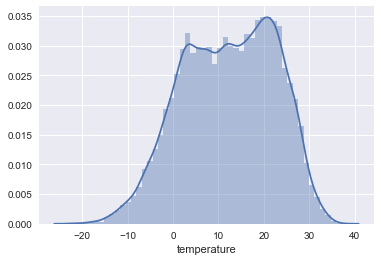

In [13]:
print(total_data.temperature.describe())
plot = sns.distplot(total_data.temperature)

count    44461.000000
mean        66.516790
std         19.884897
min         10.000000
25%         51.000000
50%         68.000000
75%         83.000000
max        100.000000
Name: humidity, dtype: float64


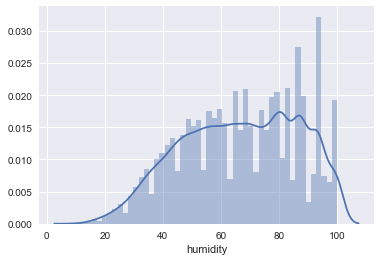

In [14]:
print(total_data.humidity.describe())
plot = sns.distplot(total_data.humidity)

count    44461.000000
mean      1017.021142
std         10.113110
min        959.000000
25%       1012.000000
50%       1017.000000
75%       1023.000000
max       1052.000000
Name: pressure, dtype: float64


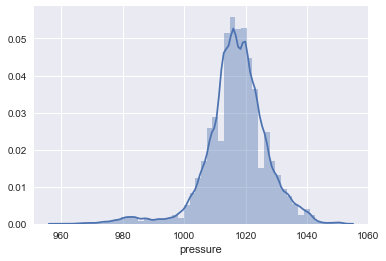

In [15]:
print(total_data.pressure.describe())
plot = sns.distplot(total_data.pressure)

count    44461.000000
mean         3.211039
std          2.189765
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         25.000000
Name: wind_speed, dtype: float64


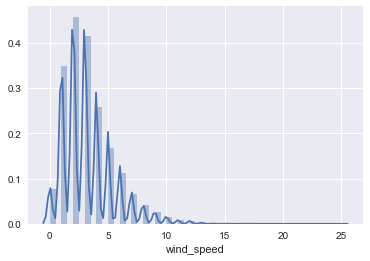

In [16]:
print(total_data.wind_speed.describe())
plot = sns.distplot(total_data.wind_speed)

count    44461.000000
mean       196.251681
std        107.432893
min          0.000000
25%        104.000000
50%        220.000000
75%        289.000000
max        360.000000
Name: wind_direction, dtype: float64


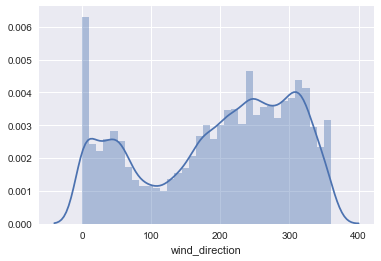

In [17]:
print(total_data.wind_direction.describe())
plot = sns.distplot(total_data.wind_direction)

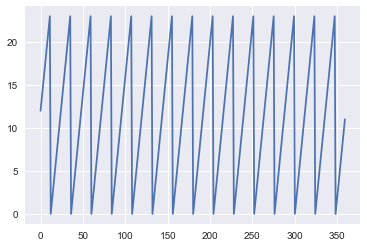

In [18]:
#We are going to extract the hours from the datetime
total_data['hour']=total_data.datetime.dt.hour
# chose a sample aproximatly 15 days
sample=total_data[:360]
sample['hour'].plot()

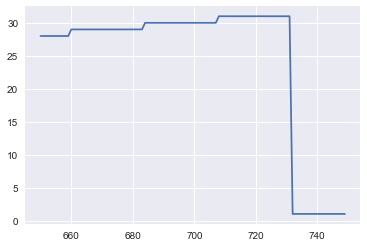

In [19]:
total_data['day']=total_data.datetime.dt.day
sample=total_data[650:750]
sample['day'].plot()

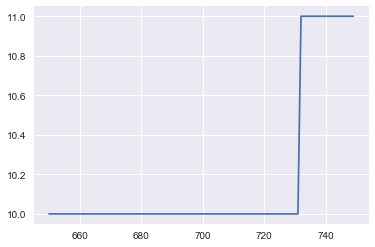

In [20]:
total_data['month']=total_data.datetime.dt.month
sample=total_data[650:750]
sample['month'].plot()

we need to see a cycle betwwn 0 and 23 that repeat 15 times. when the time goes from 23 to 0 we have a jump, so there is a problem about presenting syclical data to machine learning algorithem. we chose one day to have a look at the time arounf midnight

between record 34 and 35 : 23-22=1
between record 35 and 36 : 0-23=-23
so we need to change the encoding of the feature. A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.

we need to see a cycle betwwn 0 and 23 that repeat 15 times. when the time goes from 23 to 0 we have a jump, so there is a problem about presenting syclical data to machine learning algorithem. we chose one day to have a look at the time arounf midnight

In [21]:
def cyclical(dataset,column,max_v):
    dataset[column+'_sin']=np.sin(2*np.pi*dataset[column]/max_v)
    dataset[column+'_cos']=np.cos(2*np.pi*dataset[column]/max_v)
    return dataset


In [22]:
total_data.head(5)

,datetime,temperature,hour,humidity,pressure,wind_speed,wind_direction,day,month
0,2012-10-01 12:00:00,15.070000,12,58.0,1012.0,7.0,260.0,1,10
1,2012-10-01 13:00:00,15.070000,13,58.0,1012.0,7.0,260.0,1,10
2,2012-10-01 14:00:00,15.097676,14,57.0,1012.0,7.0,260.0,1,10
3,2012-10-01 15:00:00,15.176940,15,57.0,1012.0,7.0,260.0,1,10
4,2012-10-01 16:00:00,15.256203,16,57.0,1012.0,7.0,260.0,1,10


between record 34 and 35 : 23-22=1
between record 35 and 36 : 0-23=-23
so we need to change the encoding of the feature. A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.

In [23]:
total_data= cyclical(total_data,'hour',23.0)
total_data= cyclical(total_data,'day',365.0)
total_data= cyclical(total_data,'month',12.0)

In [24]:
total_data['year']=total_data.datetime.dt.year
total_data=total_data[total_data.year==2015]    
total_data=total_data[['year','hour_sin','hour_cos','day_sin','day_cos','month_sin','month_cos','humidity','wind_speed','wind_direction','temperature','day','month','hour']]
total_data.head(5)


,year,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,humidity,wind_speed,wind_direction,temperature,day,month,hour
19716,2015,0.000000,1.000000,0.017213,0.999852,0.5,0.866025,59.0,2.0,249.0,-5.100,1,1,0
19717,2015,0.269797,0.962917,0.017213,0.999852,0.5,0.866025,59.0,2.0,249.0,-5.100,1,1,1
19718,2015,0.519584,0.854419,0.017213,0.999852,0.5,0.866025,58.0,2.0,246.0,-5.964,1,1,2
19719,2015,0.730836,0.682553,0.017213,0.999852,0.5,0.866025,58.0,2.0,246.0,-5.964,1,1,3
19720,2015,0.887885,0.460065,0.017213,0.999852,0.5,0.866025,58.0,2.0,246.0,-5.964,1,1,4


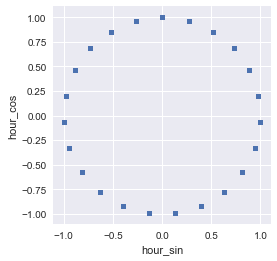

In [25]:
total_data.plot.scatter('hour_sin','hour_cos').set_aspect('equal')

In [26]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(total_data, test_size=0.4)
data_test, data_val = train_test_split(data_test, test_size=0.5)

In [27]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation
from keras.optimizers import Adam

def train_model(X_train, y_train, X_test, y_test, epochs):
    model = Sequential(
        [
            Dense(10, activation="relu", input_shape=(X_train.shape[1],)),
#             Dense(10, activation="relu"),
#             Dense(10, activation="relu"),
            Dense(1, activation="linear")
        ]
    )
    model.compile(optimizer=Adam(), loss="mean_squared_error")
    
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))
    return model, history

C:\Users\Negah\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


ImportError: Could not find 'nvcuda.dll'. TensorFlow requires that this DLL be installed in a directory that is named in your %PATH% environment variable. Typically it is installed in 'C:\Windows\System32'. If it is not present, ensure that you have a CUDA-capable GPU with the correct driver installed.

In [ ]:
def get_unencoded_features(df):
    return df[['month', 'day', 'hour']]

In [ ]:
X_train = get_unencoded_features(data_train)
X_test  = get_unencoded_features(data_test)
y_train = data_train.temperature
y_test  = data_test.temperature

In [ ]:
model_unencoded, unencoded_hist = train_model(
    get_unencoded_features(data_train),
    data_train.temperature,
    get_unencoded_features(data_test),
    data_test.temperature,
    epochs=5
)

In [ ]:
def get_encoded_features(df):
    return df[['month_sin', 'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos']]

In [ ]:
X_train = get_encoded_features(data_train)
X_test  = get_encoded_features(data_test)
y_train = data_train.temperature
y_test  = data_test.temperature

In [ ]:
model_encoded, encoded_hist = train_model(
    get_encoded_features(data_train),
    data_train.temperature,
    get_encoded_features(data_test),
    data_test.temperature,
    epochs=5
)

In [ ]:
plt.plot(unencoded_hist.history['val_loss'], "r")
ax = plt.plot(encoded_hist.history['val_loss'], "b")

now, it is prefect to present as a cyclical feature for machine learning algorithms.

Let's split our data into training and test sets.

# training and Test


In [181]:
# split the data
#X_columns=['hour_sin','hour_cos','day_sin','day_cos','month_sin','month_cos','humidity','wind_speed','wind_direction']
X_columns=['humidity','wind_speed','wind_direction']
#X_columns=['hour','day','month']
y_column=['temperature']


threshold = 0.8
X = total_data[X_columns]
y = total_data[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (7008, 3)
y_train (7008, 1)
X_test (1752, 3)
y_test (1752, 1)


Model Training / Evaluation - Using Split

MODEL LinearRegression
MAE 8.656725701146126
RMSE 10.42847937409538


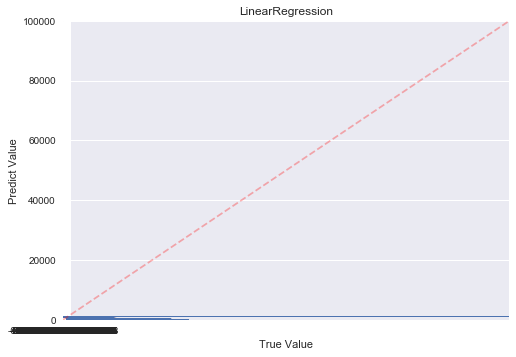

Feature Importance
                0         1
1      wind_speed  0.203226
2  wind_direction -0.018023
0        humidity -0.198577

MODEL RandomForestRegressor
MAE 5.7388176315859045
RMSE 8.084065019453394


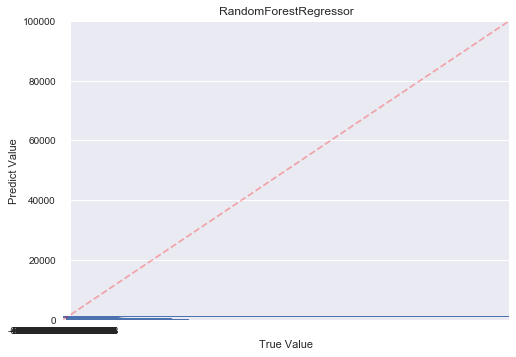

Feature Importance
                0         1
2  wind_direction  0.475558
0        humidity  0.398013
1      wind_speed  0.126429



,model,mae,rmse
1,RandomForestRegressor,5.738818,8.084065
0,LinearRegression,8.656726,10.428479


In [182]:
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor', RandomForestRegressor())
]
results = []
for m in models:
    print('MODEL', m[0])
    model = m[1]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('MAE', mae)
    print('RMSE', rmse)
    # print the chart
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot(range(0,100000, 100), range(0,100000, 100), '--r', alpha=0.3, label='Line1')
    plt.title(m[0])
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    plt.xlim([0, 100000])
    plt.ylim([0, 100000])
    plt.show()
    results.append([m[0], mae, rmse])
    
    # if there is a feature importance, print top 5
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
        
    print('')

# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'mae', 'rmse']
df_results = df_results.sort_values(by='mae')
df_results

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\Negah\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [147]:
# feature importance
importance = []
for i in range(len(X_columns)):
    importance.append([X_columns[i], model.feature_importances_[i]])
pd.DataFrame(importance).sort_values(by=1, ascending=False)

,0,1
5,month_cos,0.437448
4,month_sin,0.392370
3,day_cos,0.055917
2,day_sin,0.052387
0,hour_sin,0.038865
1,hour_cos,0.023015


In [148]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE 1.102793306292071
RMSE 1.6199855678889565


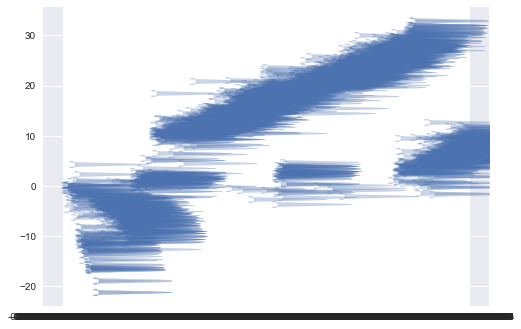

In [149]:
plt.scatter(y_test, y_pred, alpha=0.3)
plt.show()

In [ ]:
X_train = get_unencoded_features(data_train)
X_test  = get_unencoded_features(data_test)
y_train = data_train.temperature
y_test  = data_test.temperature